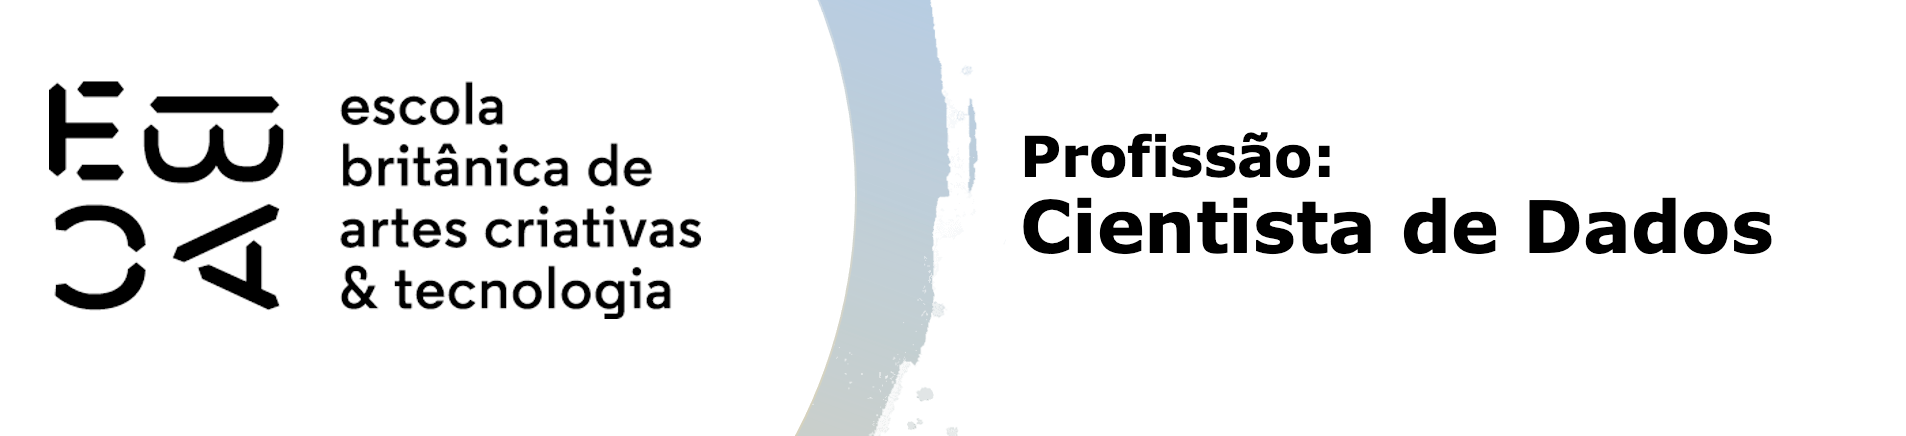

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [317]:
df = pd.read_csv('online_shoppers_intention.csv')

In [198]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [200]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [203]:
X= df.iloc[:, :6]
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000
...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667
12326,0,0.0,0,0.0,5,465.750000
12327,0,0.0,0,0.0,6,184.250000
12328,4,75.0,0,0.0,15,346.000000


In [205]:
X.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230


In [207]:
X.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

In [209]:
X_pad = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)
X_pad

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430
...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536


In [211]:
X_pad.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-2.996612e-17,6.281359e-17,-4.610172e-18,-2.535595e-17,4.610172e-17,-8.298309e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01


In [213]:
X_pad['Revenue']=df['Revenue']
X_pad['BounceRates']=df['BounceRates']
X_pad

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Revenue,BounceRates
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,False,0.200000
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,False,0.000000
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,False,0.200000
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,False,0.050000
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,False,0.020000
...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,False,0.007143
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,False,0.000000
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,False,0.083333
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,False,0.000000


## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

## Método do cotovelo

In [217]:
variaveis = ['Administrative', 'Administrative_Duration',
       'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration']

In [219]:
SQD = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_pad[variaveis])
    SQD.append(km.inertia_)

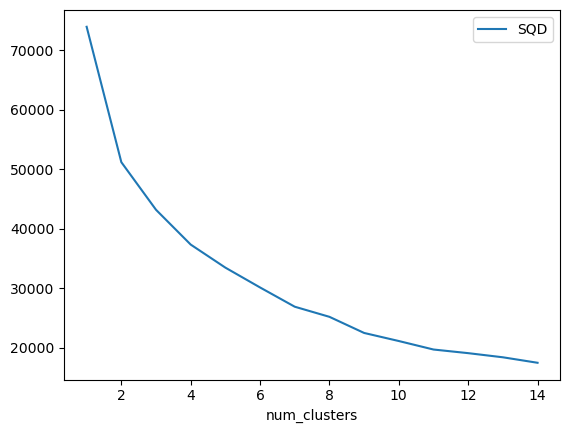

In [220]:
df_km = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df_km.plot(x = 'num_clusters', y = 'SQD');

## Coeficiente de *Silueta*

In [224]:
# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 10

# O loop percorre de 2 até o máximo de clusters
for n_clusters in range(2, max_clusters+1):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters).fit(X_pad[variaveis])
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    siluetas.append(silhouette_score(X_pad[variaveis], km.labels_))
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    X_pad['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)

<Axes: xlabel='n_clusters'>

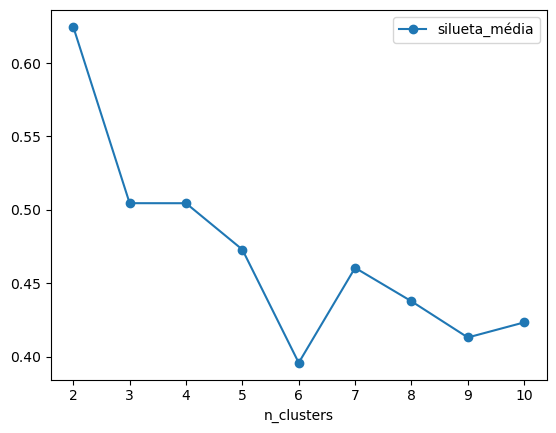

In [225]:
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')
# plt.scatter(x = df_silueta.n_clusters, y = df_silueta.silueta_média)

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

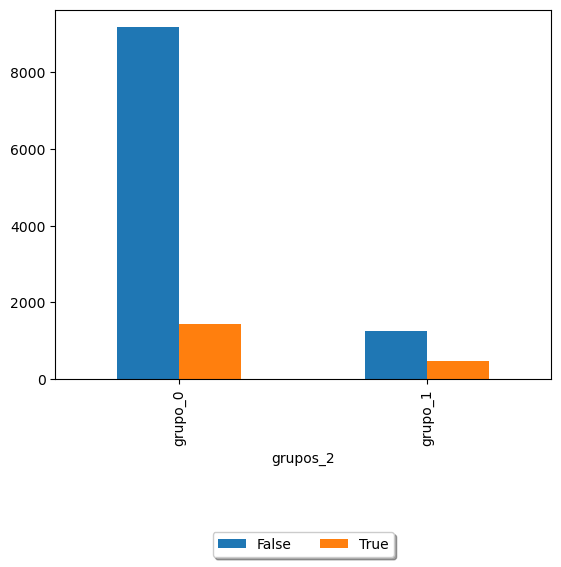

In [227]:
ax = X_pad.groupby(['grupos_2', 'Revenue'])['Revenue'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

In [306]:
def heatmap(grupo):
    # Agrupando os dados pela coluna 'Grupo' e calculando a média das variáveis
    X_pad_group = X_pad.groupby(grupo)[['Administrative', 'Administrative_Duration',
                                             'Informational', 'Informational_Duration',
                                            'ProductRelated', 'ProductRelated_Duration',
                                             'Revenue', 'BounceRates']].mean()
    
    # Criando o heatmap com os dados agregados
    sns.heatmap(X_pad_group, annot=True)
    
    plt.show()


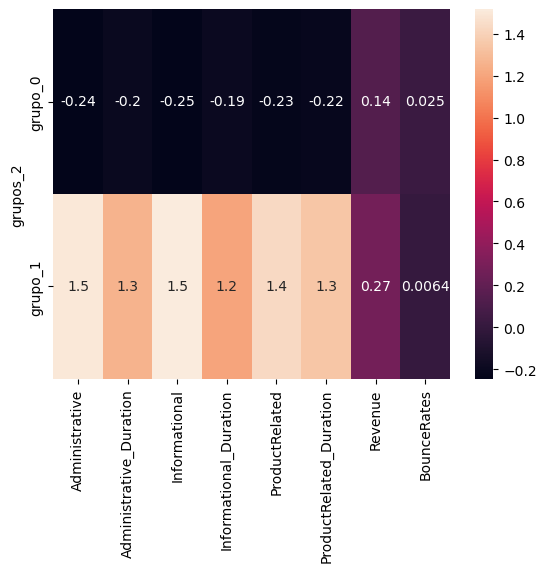

In [308]:
heatmap('grupos_2')

In [228]:
pca = PCA(n_components=2)
componentes = pca.fit_transform(X_pad[variaveis])

In [267]:
def biplot(score,coeff, y, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 2/(xs.max() - xs.min())
    scaley = 2/(ys.max() - ys.min())
    
    fig, ax = plt.subplots(figsize=(10, 10))
#     scatter = ax.scatter(xs * scalex,ys * scaley, c = y)
    sns.kdeplot(x = xs * scalex, y = ys * scaley, hue=y, ax=ax, fill=True, alpha=.6, palette='viridis')
#     ax.legend(*scatter.legend_elements())
    
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5, 
                 length_includes_head=True, head_width=0.04, head_length=0.04)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    ax.set_xlim(-0.8,0.8)
    ax.set_ylim(-0.8,0.8)
    ax.set_xlabel("PC{0}, {1:.1%} da variância explicada".format(1, pca.explained_variance_ratio_[0]))
    ax.set_ylabel("PC{0}, {1:.1%} da variância explicada".format(1, pca.explained_variance_ratio_[1]))
    ax.grid()

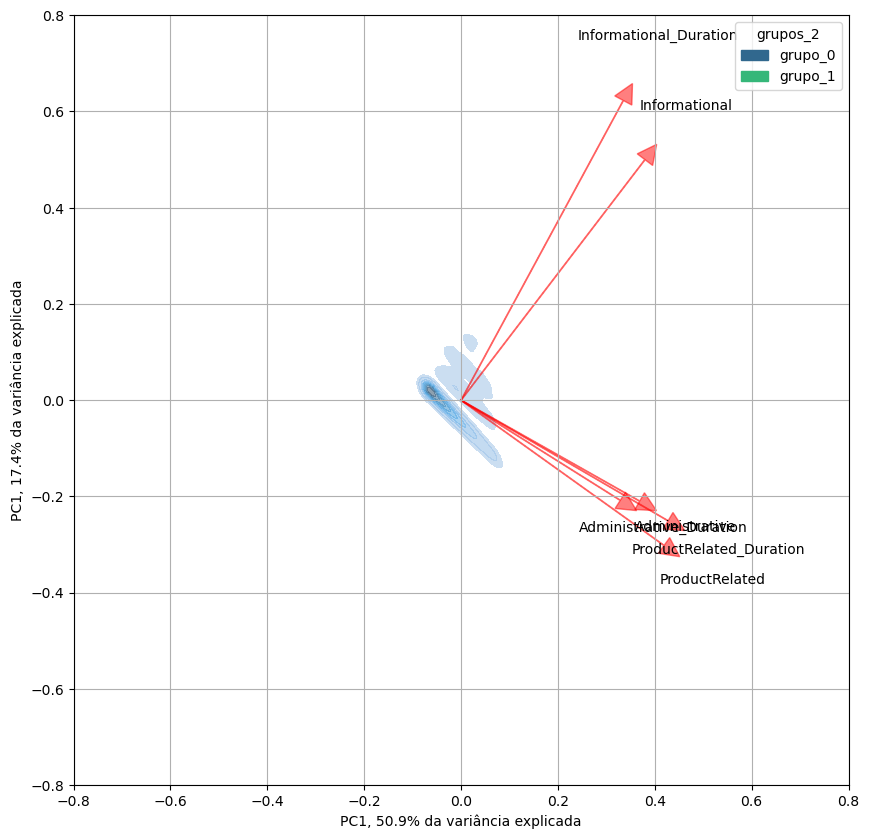

In [269]:
biplot(componentes,
       np.transpose(pca.components_[0:2, :]), 
       X_pad['grupos_2'],
       labels = variaveis)
plt.show()

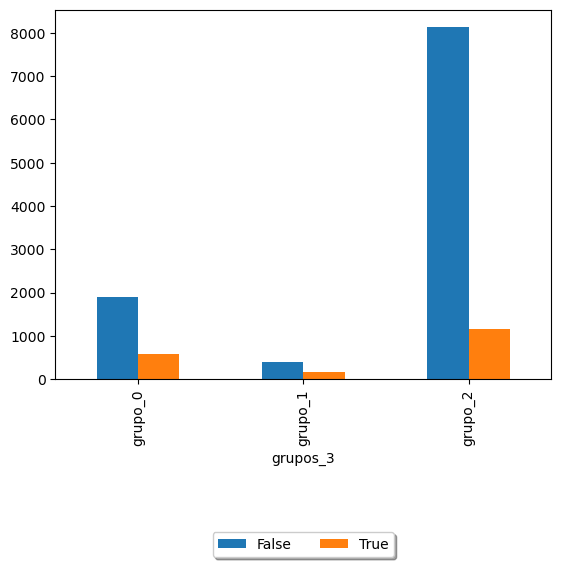

In [231]:
ax = X_pad.groupby(['grupos_3', 'Revenue'])['Revenue'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

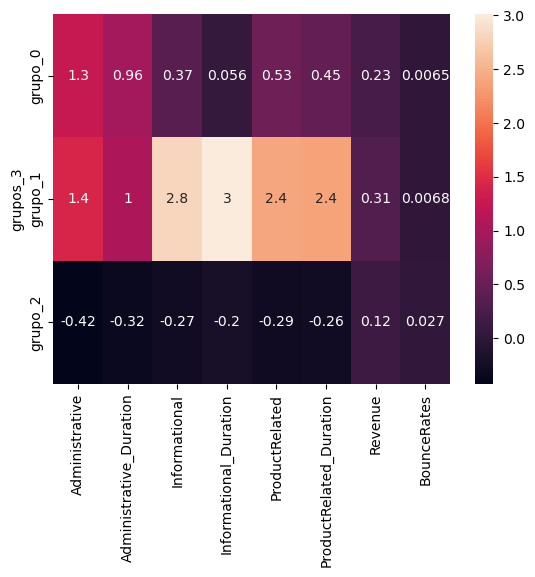

In [310]:
heatmap('grupos_3')

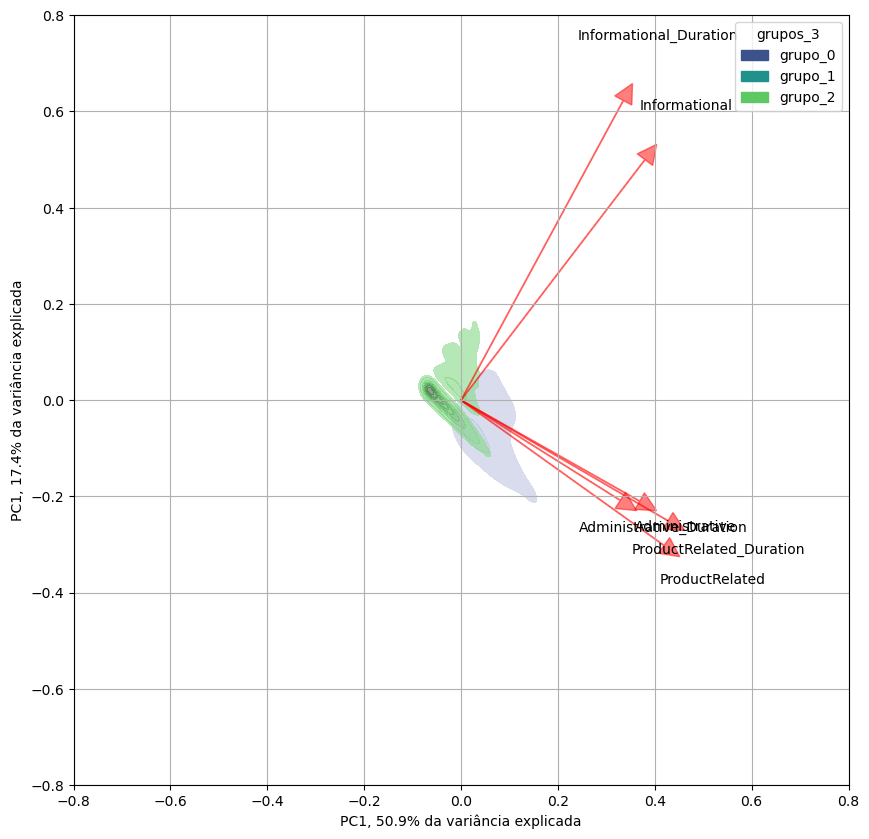

In [315]:
biplot(componentes,
       np.transpose(pca.components_[0:2, :]), 
       X_pad['grupos_3'],
       labels = variaveis)
plt.show()

<div style="background-color: lightgray; border: 2px solid gray; padding: 10px;">
Com 2 grupos o grupo 0 são os maioritariamente valores negativos e enquanto o grupo 1 maioritariamente os positivos, então seria o grupo negativo e o grupo positivo.
Com 3 grupos o grupo 2 são os maioritariamente valores negativos, todas as variáveis do grupo 1 são superiores às dos outros grupos menos o BounceRates, então seria o grupo negativo(grupo 2), o grupo alto índices de página(grupo 1) e o grupo baixo índices de página(grupo 0).

</div>

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [129]:
#criando groupby
media_por_grupo = X_pad.groupby('grupos_3')[['Revenue', 'BounceRates']].mean()
media_por_grupo

,Revenue,BounceRates
grupos_3,,
grupo_0,0.125000,0.027316
grupo_1,0.231515,0.006496
grupo_2,0.306878,0.006750


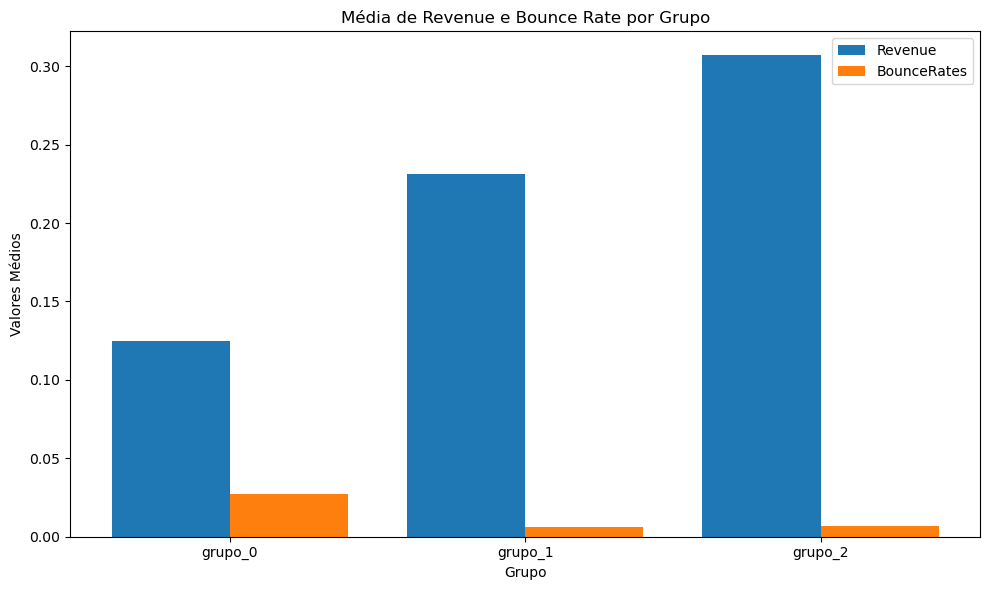

In [158]:
# Gerar um índice numérico para os grupos
x = np.arange(len(media_por_grupo))

# Largura das barras
width = 0.4

# Plotando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Barras para Revenue (deslocadas para a esquerda)
bar1 = ax.bar(x - width/2, media_por_grupo['Revenue'], width, label='Revenue')

# Barras para BounceRate (deslocadas para a direita)
bar2 = ax.bar(x + width/2, media_por_grupo['BounceRates'], width, label='BounceRates')

# Adicionando título, rótulos e legenda
ax.set_title('Média de Revenue e Bounce Rate por Grupo')
ax.set_xlabel('Grupo')
ax.set_ylabel('Valores Médios')

# Definindo os rótulos do eixo x (convertendo para string, se necessário)
ax.set_xticks(x)
ax.set_xticklabels([str(grupo) for grupo in media_por_grupo.index])  # Convertendo para string

ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

<div style="background-color: lightgray; border: 2px solid gray; padding: 10px;">
O grupo que possui clientes mais propensos à compra é o grupo 2.
</div>